# Breast Cancer Prediction 

#### Breast Cancer is the most common cancer amongst women in the world. It starts when cells in the breast begin to grow out of control. These cells usually form tumors that can be seen via X-ray or felt as lumps in the breast area.

The key challenges against it's detection is how to classify tumors into malignant(Cancerous) or benign(Non-Cancerous).

The Breast cancer dataset is available in UCI machine learning repository maintained by University of California, Irvine.

The dataset contains 569 samples of malignant and benign tumor cells.

The first two columns in the dataset store the unique ID numbers of the samples and 
the corresponding diagnosis (M=malignant, B=benign), respectively.

The columns 3-32 contain 30 real-value features that have been computed from 
digitized images of the cell nuclei, which can be used to build a model to 
predict whether a tumor is benign or malignant.

        1= Malignant (Cancerous) - Present (M)
        0= Benign (Not Cancerous) -Absent (B)

Ten real-valued features are computed for each cell nucleus:

1.  radius (mean of distances from center to points on the perimeter)
2.  texture (standard deviation of gray-scale values)
3.  perimeter
4.  area
5.  smoothness (local variation in radius lengths)
6.  compactness (perimeter^2 / area - 1.0)
7.  concavity (severity of concave portions of the contour)
8.  concave points (number of concave portions of the contour)
9.  symmetry
10. fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values)
of these features were computed for each image, resulting in 30 features. 
For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

    * All feature values are recoded with four significant digits.

    * Missing attribute values: none

Class distribution: 357 benign, 212 malignant

## Load the libraries

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt 
import seaborn as sns  

import warnings
warnings.filterwarnings("ignore")

import sklearn.linear_model as skl_lm
from sklearn import neighbors
from sklearn.metrics import confusion_matrix, classification_report, precision_score

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

import xgboost as xgb

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
sns.set(style = 'whitegrid', color_codes=True, font_scale=1.3)

In [4]:
%matplotlib inline

## Read the dataset

In [5]:
df = pd.read_csv('C:/Users/grees/PycharmProjects/pythonproject_1/data.csv')

In [6]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [8]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [9]:
df = df.drop('Unnamed: 32', axis = 1)

In [10]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [11]:
df.diagnosis.replace({"M":1,"B":0},inplace=True)
df.diagnosis.unique()

array([1, 0], dtype=int64)

### In order to conduct the analysis easily, the target column is converted as: 
        malignant - 1 
        benign - 0

Number of cells labeled Bengin:  357
Number of cells labeled malignant:  212
 
Percentage of cells labeled Benign:  62.74 %
Percentage of cells labeled Malignant:  37.26 %


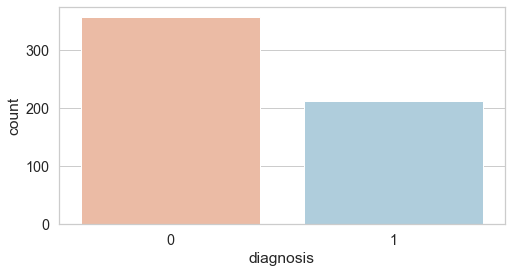

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(df['diagnosis'], palette = 'RdBu')

benign, malignant = df['diagnosis'].value_counts()
print('Number of cells labeled Bengin: ', benign)
print('Number of cells labeled malignant: ', malignant)
print(' ')
print('Percentage of cells labeled Benign: ', round(benign / len(df) * 100, 2), '%')
print('Percentage of cells labeled Malignant: ', round(malignant / len(df) * 100, 2), '%')

## Correlation Map

Text(0.5, 1.0, 'Correlation Map')

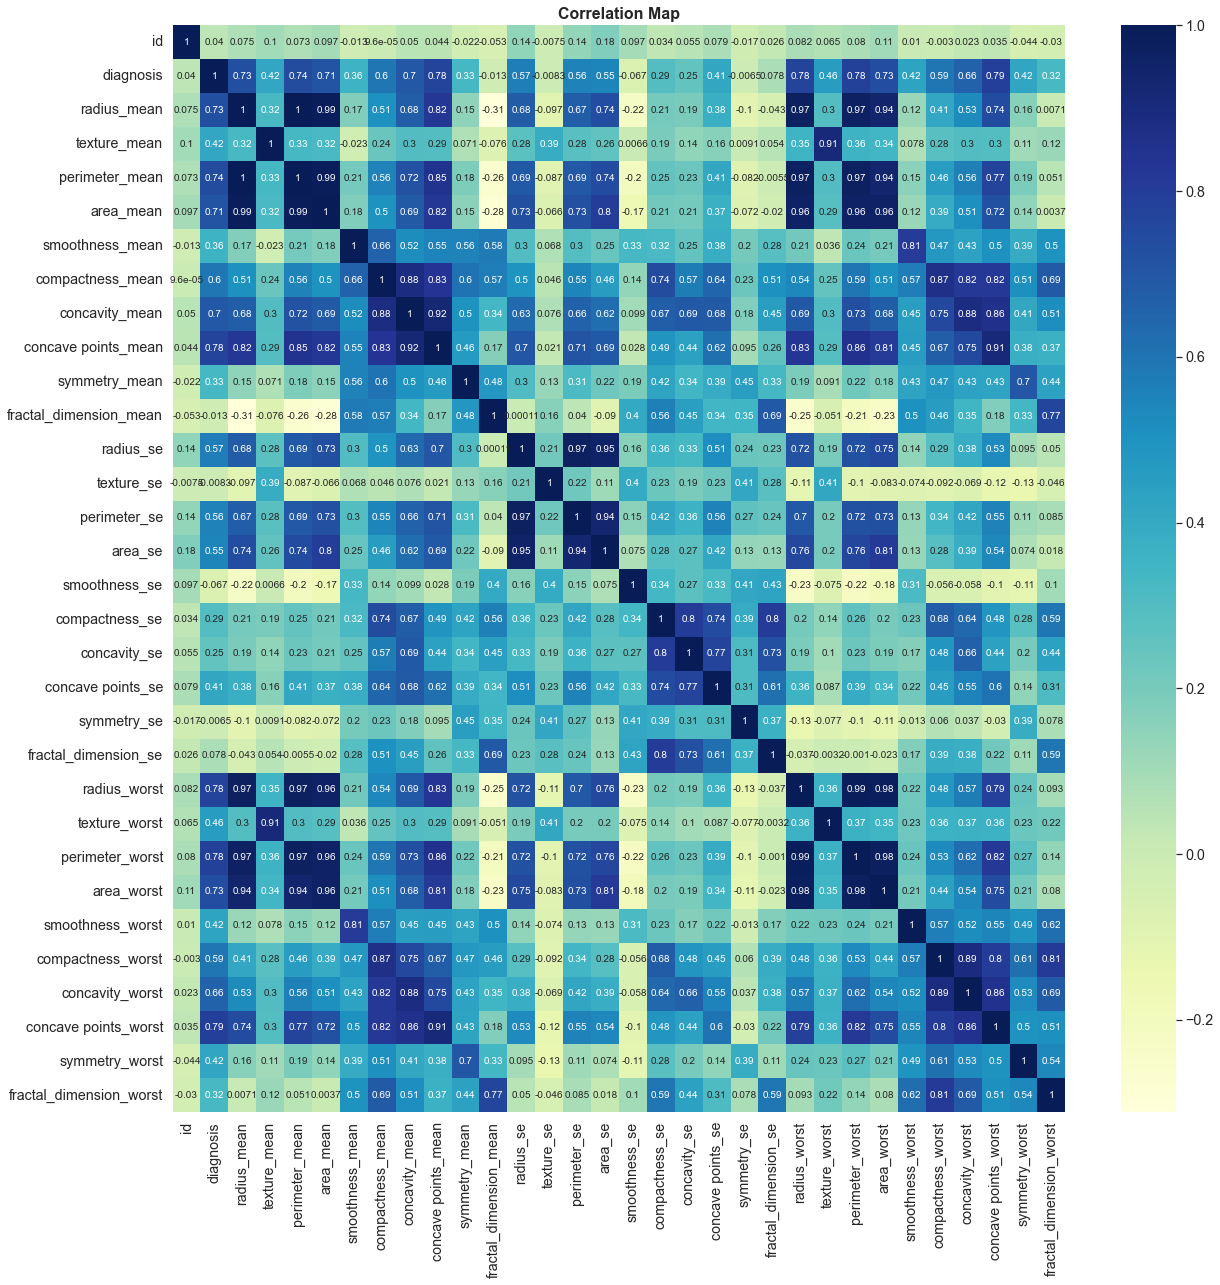

In [13]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

#### The heat map shows the relation between the attributes from the dataset. 

There is presence of multicollinearity btw some variables ( radius_mean has a correlation of 1 and 0.99 with perimeter_mean and area_mean columns). Another case is the multicollinearity btw mean and worst columns (eg:, radius_mean has a correlation of 0.97 with radius worst). Generally, each of the 10 key attributes display very high (from 0.7 to 0.97) correlation btw its mean and worst columns. This is somewhat inevitable, because the "worst" columns are essentially just a subset of the "mean" columns; the "worst" columns are also the "mean" of some values (the three largest values among all observations). Therefore, I think we should discard the "worst" columns from our analysis and only focus on the "mean" columns. In short, we will drop all "worst" columns from our dataset, then pick only one of the three attributes that describe the size of cells.

From general conditions, radius can be treated as one of the main attribute to represent the size of the cell.

The following columns are the one's that shows the greatest correlation with the diagnosis column. 

In [14]:
corr[abs(corr['diagnosis']) > 0.59].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

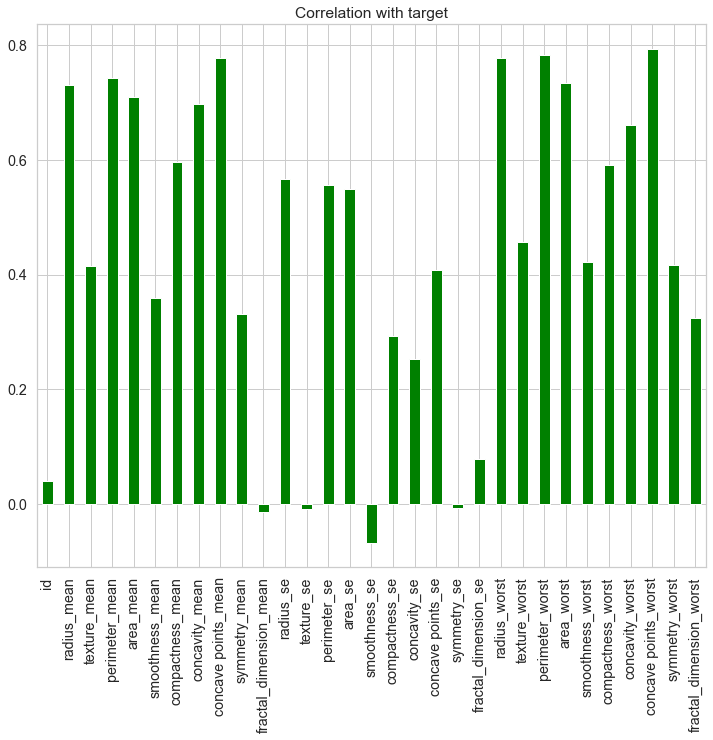

In [15]:
df.drop('diagnosis', axis=1).corrwith(df.diagnosis).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target",color="green");

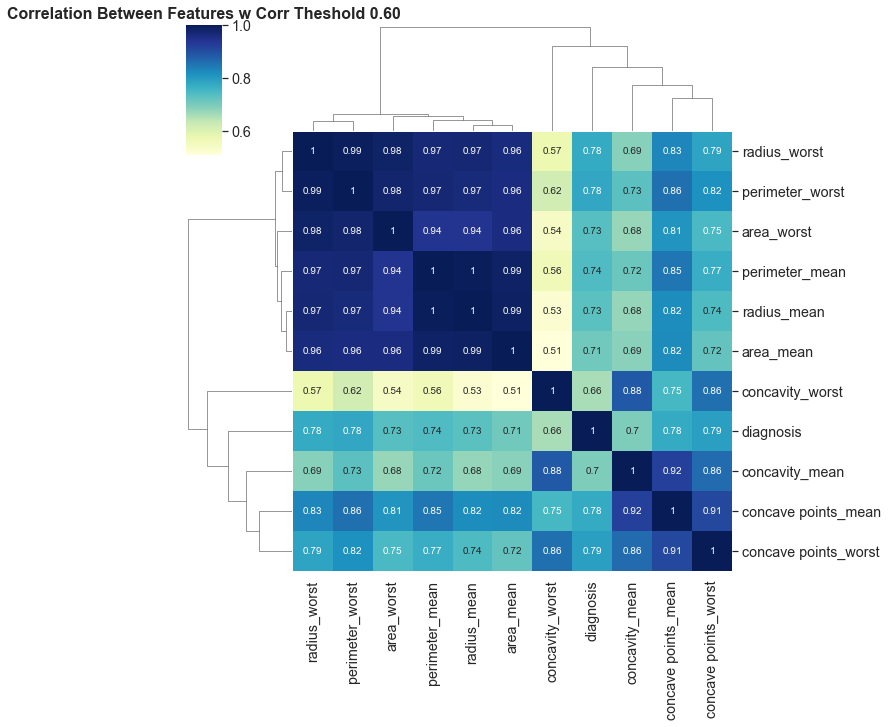

In [16]:
corr_matrix = df.corr()
threshold = 0.60 
filter = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[filter].tolist()
sns.clustermap(df[corr_features].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Between Features w Corr Theshold 0.60", fontweight = "bold", fontsize=16)
plt.show()

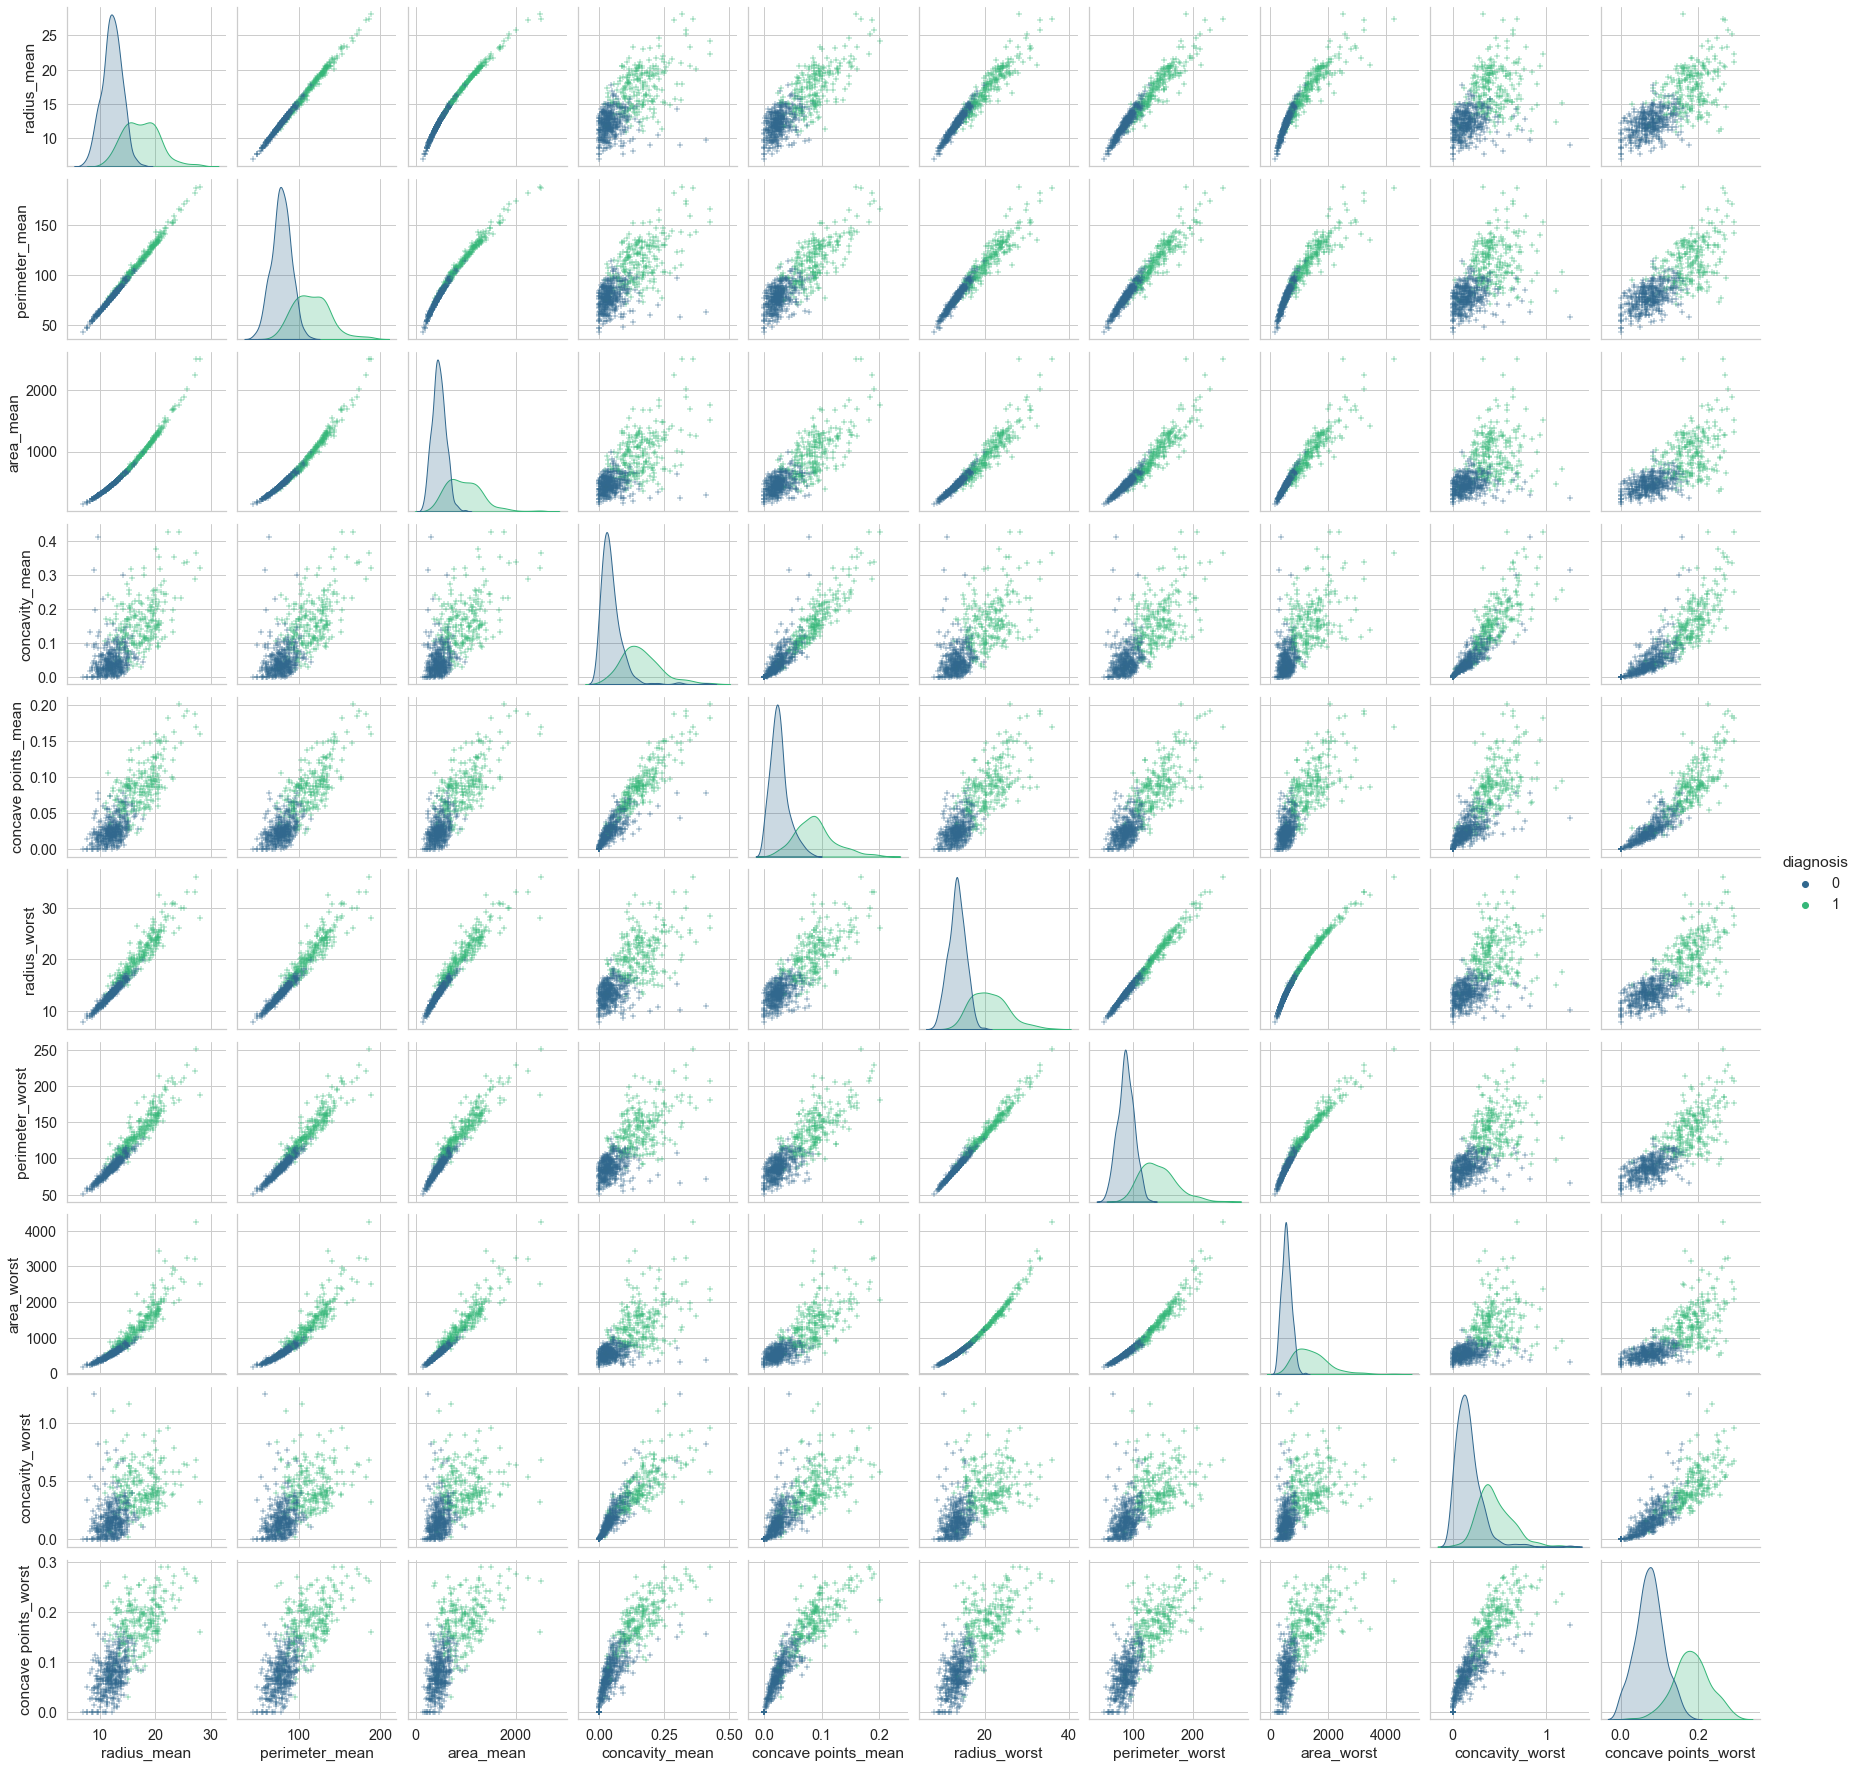

In [17]:
sns.pairplot(df[corr_features], diag_kind = "kde", markers = "+", hue = "diagnosis", palette='viridis')
plt.show()

### Splitting the data to x and y before Local Outlier Factorization

The Local Outlier Factor[LOF] algorithm is an unsupervised anomaly detection method which computes the local density deviation of a given data point with repect to itsneighbors. It considers as ouliers the samples that have a substantially lower density than their neighbors.

In [18]:
from sklearn.neighbors import LocalOutlierFactor

y=df["diagnosis"]
X=df.drop(["diagnosis"],axis=1)
columns= df.columns.tolist()

In [19]:
lof= LocalOutlierFactor()
y_pred=lof.fit_predict(X)
y_pred[0:30]

array([-1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1,  1, -1, -1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

1  = inlier
-1 = outlier

In [20]:
x_score= lof.negative_outlier_factor_
outlier_score= pd.DataFrame()
outlier_score["score"]=x_score

lofthreshold= -2.5
loffilter= outlier_score["score"]< lofthreshold
outlier_index= outlier_score[loffilter].index.tolist()

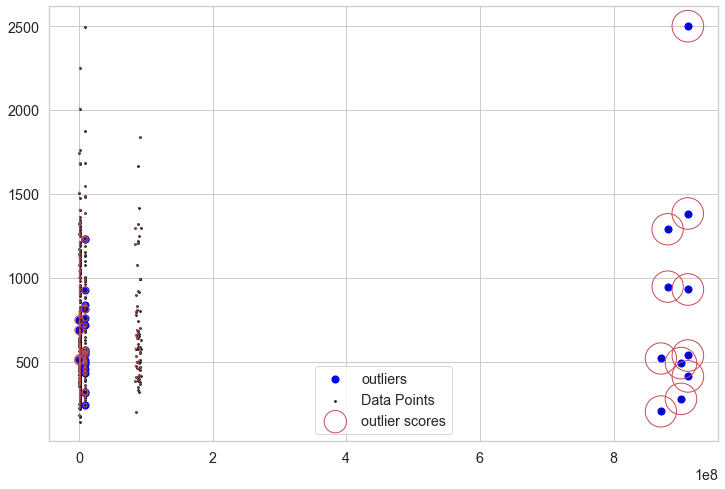

In [21]:
plt.figure(figsize=(12,8.))
plt.scatter(X.iloc[outlier_index, 0], X.iloc[outlier_index, 4], color="blue", s=50, label="outliers")
plt.scatter(X.iloc[:,0], X.iloc[:, 4], color="k", s=3, label="Data Points")

radius=(x_score.max()- x_score)/(x_score.max()-x_score.min())
outlier_score["radius"]=radius
plt.scatter(X.iloc[:, 0], X.iloc[:, 4], s=1000*radius, edgecolors="r", facecolors="none", label="outlier scores")
plt.legend();

In [22]:
X= X.drop(outlier_index)
y= y.drop(outlier_index).values

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NeighborhoodComponentsAnalysis
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), SVC(kernel="rbf",random_state=15), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'SVC': SVC(random_state=15),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', colsample_bylevel=None,
               colsample_bynode=None, colsample_bytree=None,
               enable_categorical=False, gamma=None, gpu_id=None,
               importance_type=None, interaction_constraints=None,
               learning_rate=None, max_delta_step=None, max_depth=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               predictor=None, random_state=0, reg_alpha=None, reg_lambda=None,
     

In [25]:
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.9565217391304348
KNeighborsClassifier 0.9751552795031055
SVC 0.9627329192546584
DecisionTreeClassifier 0.9503105590062112
RandomForestClassifier 0.9627329192546584
GradientBoostingClassifier 0.9503105590062112
AdaBoostClassifier 0.9751552795031055
[12:00:38] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier 0.968944099378882


Text(0.5, 1.0, 'Plotting the model accuracies')

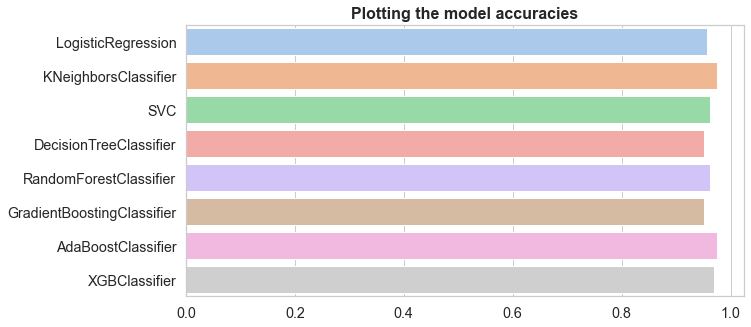

In [26]:
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key, palette = 'pastel')
plt.title('Plotting the model accuracies', fontsize = 16, fontweight='bold')

All the models perform with more than 90% accuracy, where DecisioTreeClassifier has the lowest of 90.058% and LogisticRegression has the highest of 98.25% accuracy.

#### To improve the accuracy of the model, add a few changes 

In [27]:
lr = LogisticRegression(solver='lbfgs', max_iter = 10000)
rs = []
acc = []
for i in range (1, 25, 1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = i)    
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

1 0.5887850467289719
2 0.6261682242990654
3 0.6261682242990654
4 0.6448598130841121
5 0.6728971962616822
6 0.6448598130841121
7 0.6728971962616822
8 0.6448598130841121
9 0.42990654205607476
10 0.6635514018691588
11 0.5981308411214953
12 0.6261682242990654
13 0.6448598130841121
14 0.7102803738317757
15 0.6448598130841121
16 0.38317757009345793
17 0.6542056074766355
18 0.5327102803738317
19 0.6822429906542056
20 0.5420560747663551
21 0.6448598130841121
22 0.37383177570093457
23 0.6728971962616822
24 0.616822429906542


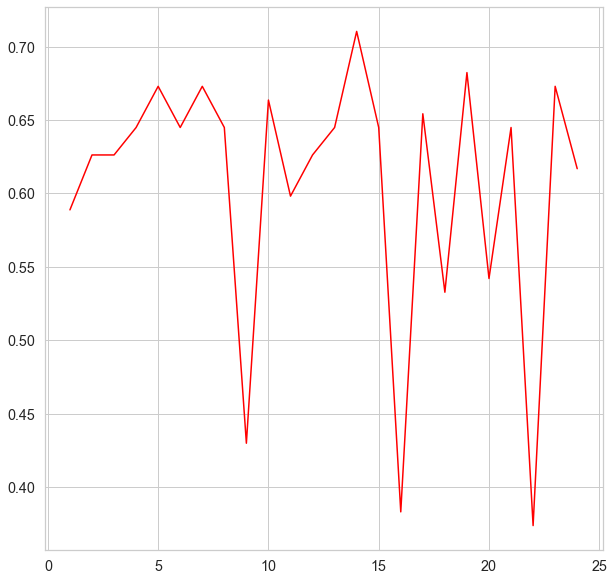

In [28]:
plt.figure(figsize = (10,10))
plt.plot(rs, acc, color='red')

for i in range(len(rs)):
    print(rs[i], acc[i])

From the above fig, it is observed that the model touches somewhere around 99% between (20 - 25). And the next code shows where exactly this happens.

In [29]:
for i in range(0, 24):
    if acc[i] > 0.98:
        print(acc[i])

From the above plot, it can be concluded that highest accuracy is achieved at 20th iteration.

#### A model can be finally build with an accuracy of 99.12%

The 8 models that are used to achieve the final result.

* LogisticRegression 99.12 %

* KNeighborsClassifier 95.32 %

* SVC 96.50 %

* DecisionTreeClassifier 90.05 %

* RandomForestClassifier 96.50 %

* GradientBoostingClassifier 97.67 %

* AdaBoostClassifier 96 %

* XGBClassifier 97.67 %